# Figures from "Spatially organized multicellular immune hubs in human colorectal cancer"
## Code for key pannels included in Figure 4 -- Epithelial cells 

In [1]:
code = '../code/';
codeExternal =  '../external';
data = '../data/';



In [ ]:
run([code 'util/run_set_figure_defaults.m']);

% Other options (e.g. svg or eps) are possible:
outSuf = { '-dpng' } 
outDirPlot = { '../results/figures/' };


zColSet = 

  struct with fields:

           rainbow14: {1x14 cell}
           rainbow15: {1x15 cell}
           rainbow18: {1x18 cell}
           rainbow21: {1x21 cell}
        crcTypeColor: {'#0072B2'  '#B2DF8A'  '#E41A1C'  '#FB9A99'}
            crcTypeC: {'#E41A1C'  '#0072B2'  '#B2DF8A'}
    crcTypeColorName: {'MSS'  'Normal'  'MSI_MLH1Meth'  'MSI_MLH1NoMeth'}


zColSet = 

  struct with fields:

           rainbow14: {1x14 cell}
           rainbow15: {1x15 cell}
           rainbow18: {1x18 cell}
           rainbow21: {1x21 cell}
        crcTypeColor: {'#0072B2'  '#B2DF8A'  '#E41A1C'  '#FB9A99'}
            crcTypeC: {'#E41A1C'  '#0072B2'  '#B2DF8A'}
    crcTypeColorName: {'MMRP'  'Normal'  'MMRd'  'MMRd_MLH1NoMeth'}



In [ ]:
addpath(genpath(code))

In [ ]:
addpath(genpath(codeExternal))

## Loading main data object

In [ ]:

colon10x_default = readDataRobj([ data 'colon10x_default/' ])

## Loading tSNE coordinate files

In [ ]:


[zFile,~,zFname] = fileList([ data 'cNMF_tSNE/*.gz']);

zFname = regexprep(zFname,'.tsv.gz','');
zFname = regexprep(zFname,'crc295v4_cNMF_tSNE_','');
zFname = regexprep(zFname,'allImm','Imm');
zFname{end} = 'global';

for zi = 1:length(zFname)
   [zRaw,~,zH] = fastMatRead(zFile{zi});    
   tSNE_coord.(zFname{zi}).sampleID = zH;
   tSNE_coord.(zFname{zi}).ydata = zRaw;
end

tSNE_coord

## Load ccNMF summary file

In [ ]:
ccNMFexpAlt = load([ data 'matlab/crc10x_c295v4_basic_ccNMFv6_reExp_qN_subSet.mat'])

zSubG = ismember(ccNMFexpAlt.ensgID,colon10x_default.ensgID);
ccNMFexpAlt = structSubSelectMat(ccNMFexpAlt,zSubG);
assert(isequal(ccNMFexpAlt.ensgID,colon10x_default.ensgID));

In [83]:
zOutP = 'Figure_4'
run run_set_figure_defaults

zMergeT = struct2table(groupTable(colon10x_default.metatable,'PatientTypeID'));

colon10x_default.metatable.MMRStatusTumor = colon10x_default.metatable.MMRStatus;
colon10x_default.metatable.MMRStatusTumor = regexprep(colon10x_default.metatable.MMRStatusTumor,'NA','Normal');

zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);


zOutP =

    'Figure_4'

Done - return


### Figure 4A


zcf =

    'Epi'


zfig = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [1 1 1]
    Position: [0 0 2400 2000]
       Units: 'pixels'

  Use GET to show all properties


zopts =

     []


zCmap =

    0.1059    0.6196    0.4667
    0.8510    0.3725    0.0078
    0.4588    0.4392    0.7020
    0.9059    0.1608    0.5412
    0.4000    0.6510    0.1176
    0.9020    0.6706    0.0078
    0.6510    0.4627    0.1137
    0.4000    0.4000    0.4000
    0.1059    0.6196    0.4667
    0.8510    0.3725    0.0078
    0.4588    0.4392    0.7020

Saving plot: ../results/figures//Figure_4/Fig4_tSNE_Epi_MMRsplit.png.-dpng


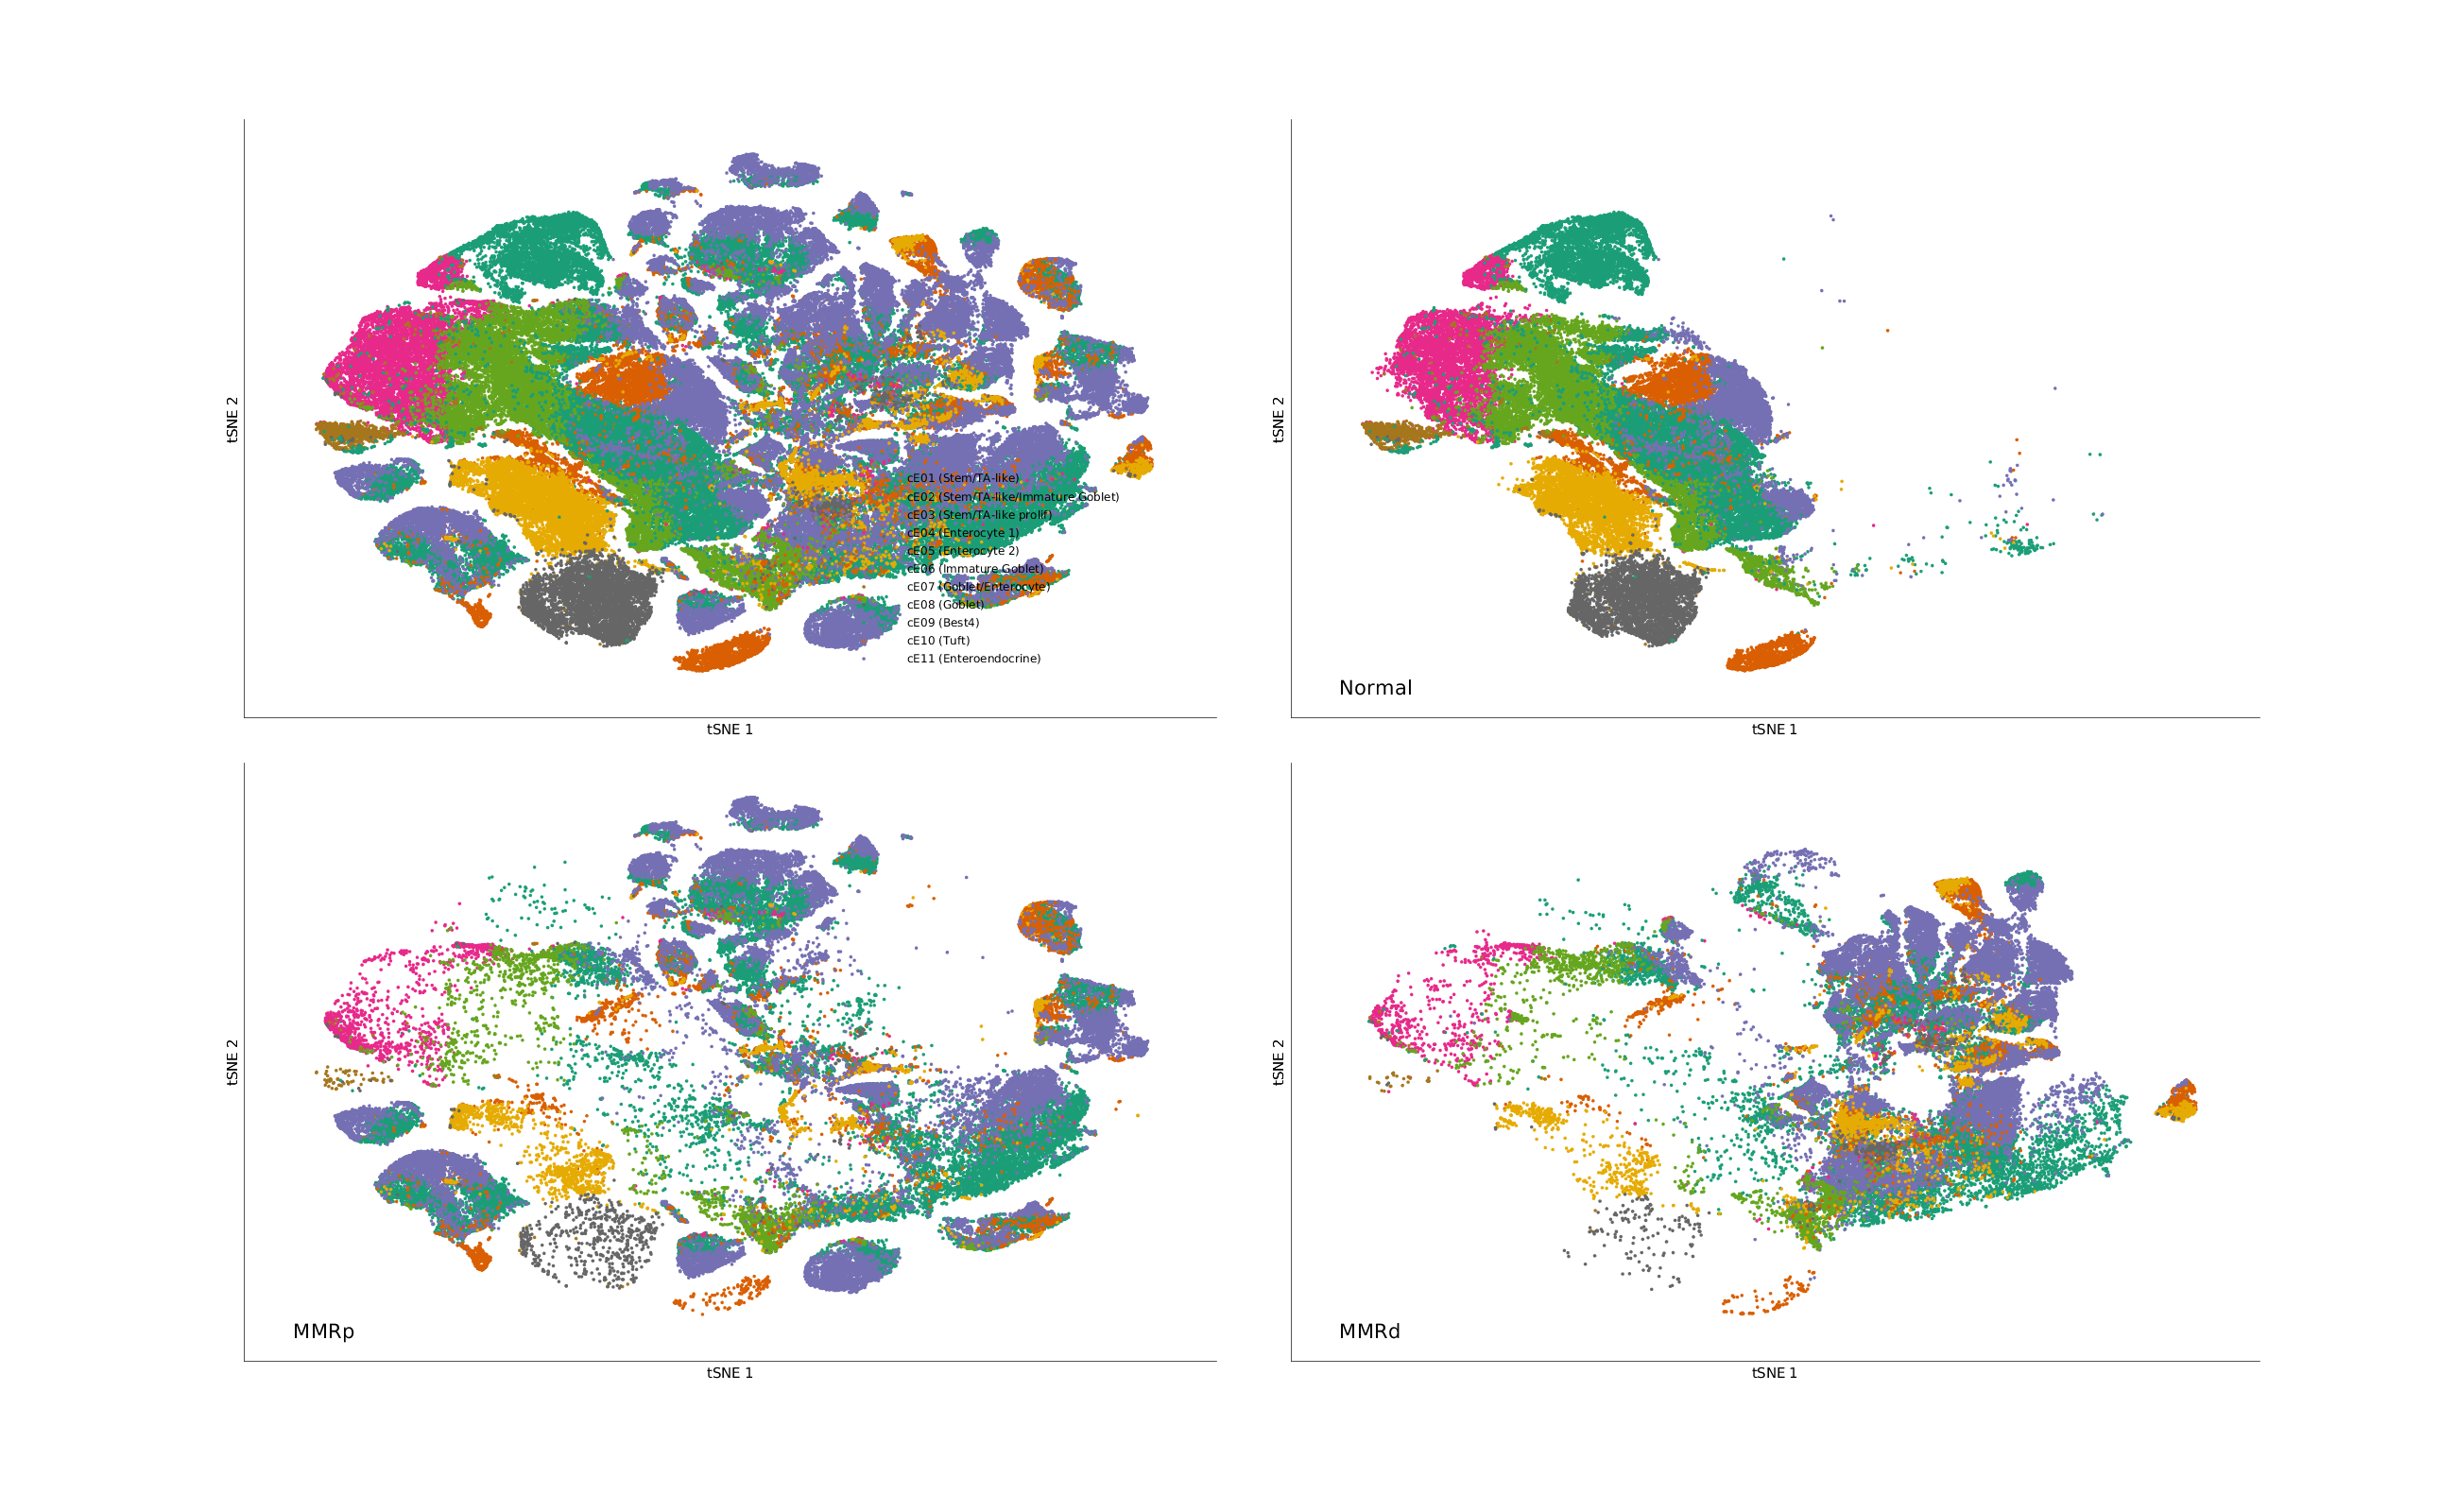

In [79]:
%plots -s 2400,2000

zcf = 'Epi'
[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);
zCl = colon10x_default.annot.clFull(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);

zfig = figure('Position',[0 0 2400 2000])
subplot1(2,2);

zopts = []
zopts.newPlot = 0;
zopts.pSize = 8;
zopts.doAlpha = 0.7;
zopts.doPosTxt = 0;
zopts.fontSize = 16;
zCmap = brewermap(luniq(zCl),'Dark2')

subplot1(1);
plot_tsne_scatter(zYdata,zCl,zCmap,[],zopts);

zyl = ylim();
zxl = xlim();

zopts.newPlot = 0;
zopts.pSize = 8;
zopts.doPosTxt = 0;
zopts.fontSize = 16;

subplot1(2);
zSelS = strcmp(zMMRtype','Normal');
plot_tsne_scatter(zYdata(zSelS,:),zCl(zSelS),zCmap,[],zopts);
text(0.05,0.05,'Normal','sc');

legend off 
xlim(zxl)
ylim(zyl);

subplot1(3);
zSelS = strcmp(zMMRtype,'MMRp');
plot_tsne_scatter(zYdata(zSelS,:),zCl(zSelS),zCmap,[],zopts);
text(0.05,0.05,'MMRp','sc');

legend off 
xlim(zxl)
ylim(zyl);

subplot1(4);
zSelS = strcmp(zMMRtype,'MMRd');
plot_tsne_scatter(zYdata(zSelS,:),zCl(zSelS),zCmap,[],zopts);
text(0.05,0.05,'MMRd','sc');

legend off 
xlim(zxl)
ylim(zyl);

%%

zOutPlot = sprintf('%s/Fig4_tSNE_%s_MMRsplit',zOutP,zcf);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

### Figure 4A


zcf =

    'Epi'


zfig = 

  Figure (1) with properties:

      Number: 1
        Name: ''
       Color: [1 1 1]
    Position: [0 0 2400 750]
       Units: 'pixels'

  Use GET to show all properties


zopts =

     []


zCmapRand =

    0.4667    0.0667    0.3333
    0.6667    0.2667    0.5333
    0.8000    0.6000    0.7333
    0.0667    0.2667    0.4667
    0.2667    0.4667    0.6667
    0.4667    0.6667    0.8667
    0.0667    0.4667    0.4667
    0.2667    0.6667    0.6667
    0.4667    0.8000    0.8000
    0.0667    0.4667    0.2667
    0.2667    0.6667    0.4667
    0.5333    0.8000    0.6667
    0.4667    0.4667    0.0667
    0.6667    0.6667    0.2667
    0.8667    0.8667    0.4667
    0.4667    0.2667    0.0667
    0.6667    0.4667    0.2667
    0.8667    0.6667    0.4667
    0.4667    0.0667    0.1333
    0.6667    0.2667    0.3333
    0.8667    0.4667    0.5333
    0.4667    0.0667    0.3333
    0.6667    0.2667    0.5333
    0.8000    0.6000    0.7333
    0.0667    0.2667 

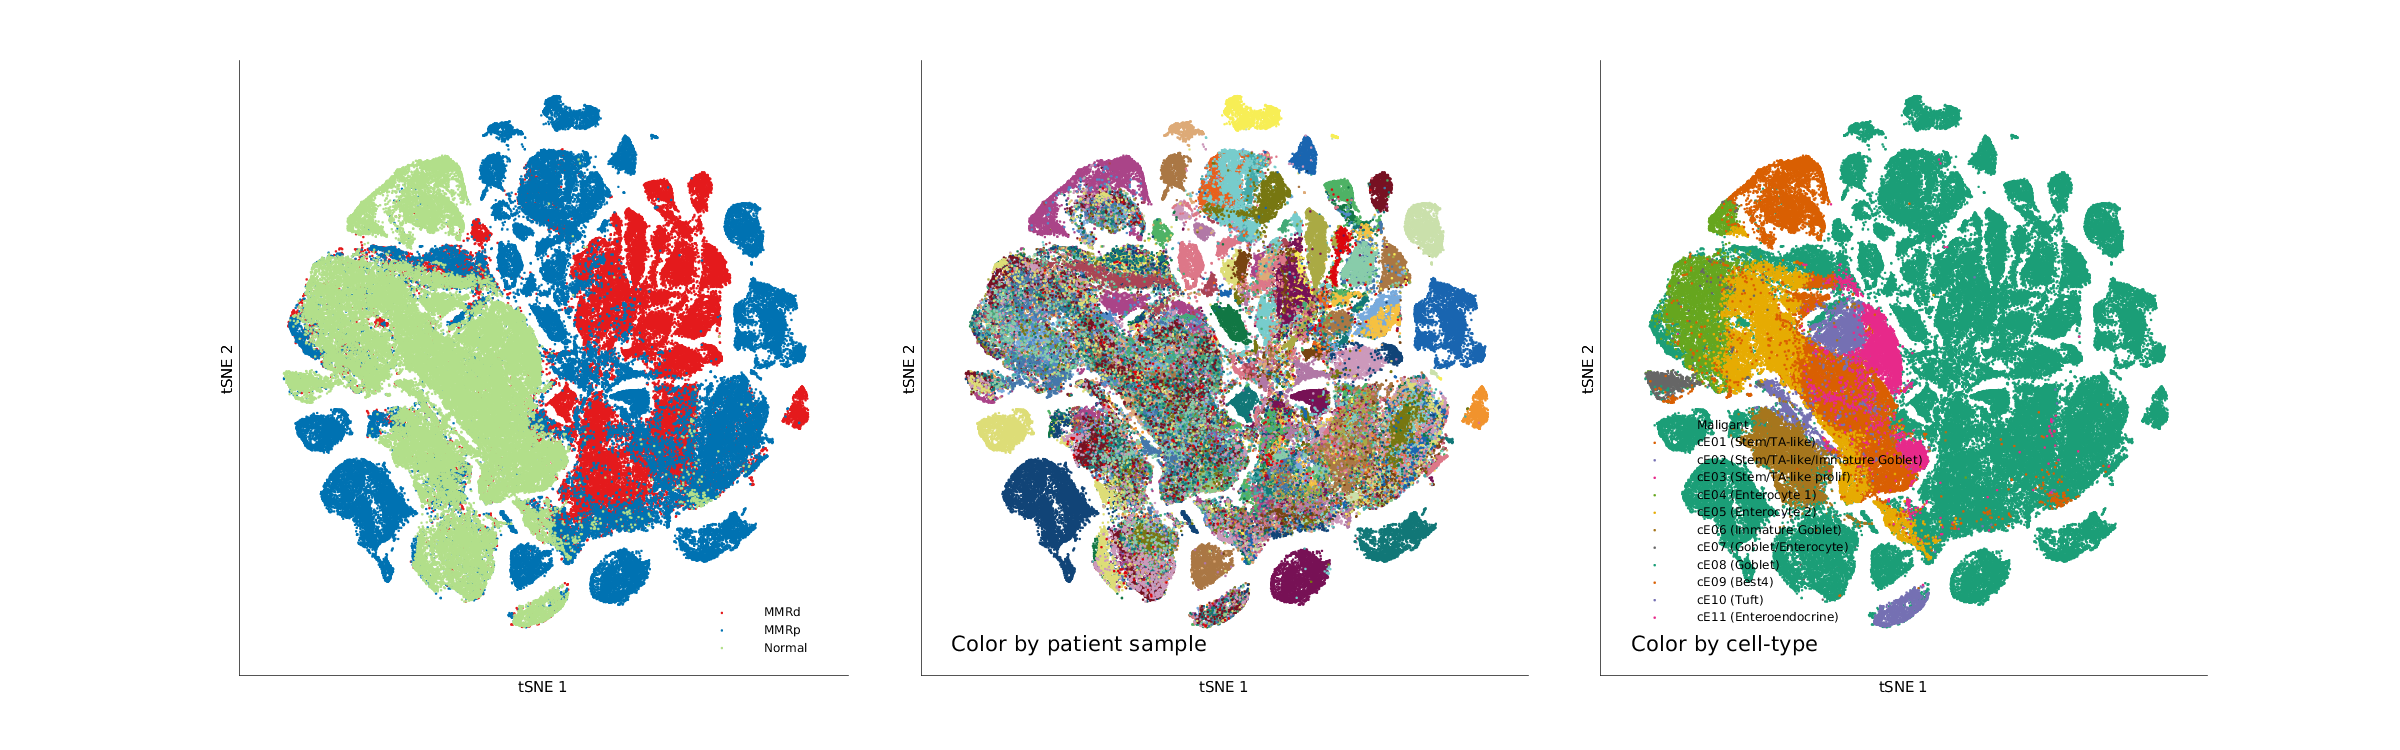

In [84]:
%plot -s 2400,750
zcf = 'Epi'
[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);
zCl = colon10x_default.annot.clFull(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);

zBIDsub = zBID(zia);

zClT = zCl;
zClT(~strcmp(zMMRtype,'Normal')) = {'Maligant'};

%%

zfig = figure('Position',[0 0 2400 750 ])

subplot1(1,3);

subplot1(1)

zopts = []
zopts.newPlot = 0;
zopts.pSize = 5;
zopts.doAlpha = 0.5;
zopts.doPosTxt = 0;
zopts.fontSize = 16;

zCmap = colorSet(zColSet.crcTypeC);

plot_tsne_scatter(zYdata,zMMRtype,zCmap,[],zopts);

subplot1(2)
zCmapRand = [ colorSet(zColSet.rainbow21); colorSet(zColSet.rainbow18); colorSet(zColSet.rainbow14);];
zCmapRand = [ zCmapRand; zCmapRand ];
zCmapRand = zCmapRand(randperm(length(zCmapRand)),:);

plot_tsne_scatter(zYdata,zBIDsub,zCmapRand,[],zopts);
legend off
text(0.05,0.05,'Color by patient sample','sc');

subplot1(3)
zCmap = brewermap(luniq(zClT),'Dark2')
plot_tsne_scatter(zYdata,zClT,zCmap,[],zopts);
text(0.05,0.05,'Color by cell-type','sc');

%%

zOutPlot = sprintf('%s/Fig4a_tSNE_%s_MMR_pid_cl',zOutP,zcf);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)

### Figure 4B - Epithelial global program heatmap

Done - return

ans =

  6x1 cell array

    {'C113_N'}
    {'C115_N'}
    {'C119_N'}
    {'C133_N'}
    {'C135_N'}
    {'C151_T'}

Done - return

zopts =

     []


zOrdTX =

     []

Optimal leaf orderX
                   legendFig: 1
                  sortLegend: 1
                legendOrient: 'Vertical'
               groupColorMap: {[12x3 double]  [8x3 double]  [12x3 double]}
                        grey: [0.6627 0.6627 0.6627]
                     axisObj: []
                     showTxt: 0
          XTickLabelRotation: 60
                     doSortY: 1
                     doSortX: 1
         doLeafOptimalOrderY: 2
    doLeafOptimalOrderY_data: []
         doLeafOptimalOrderX: 2
    doLeafOptimalOrderX_data: []
                externXOrder: 0
                externYOrder: 0
                    colormap: [128x3 double]
                    colorLim: [0.0200 0.9800]
                   colorHard: []
                    fontSize: 12
                axisFontSize: 9
            optLea

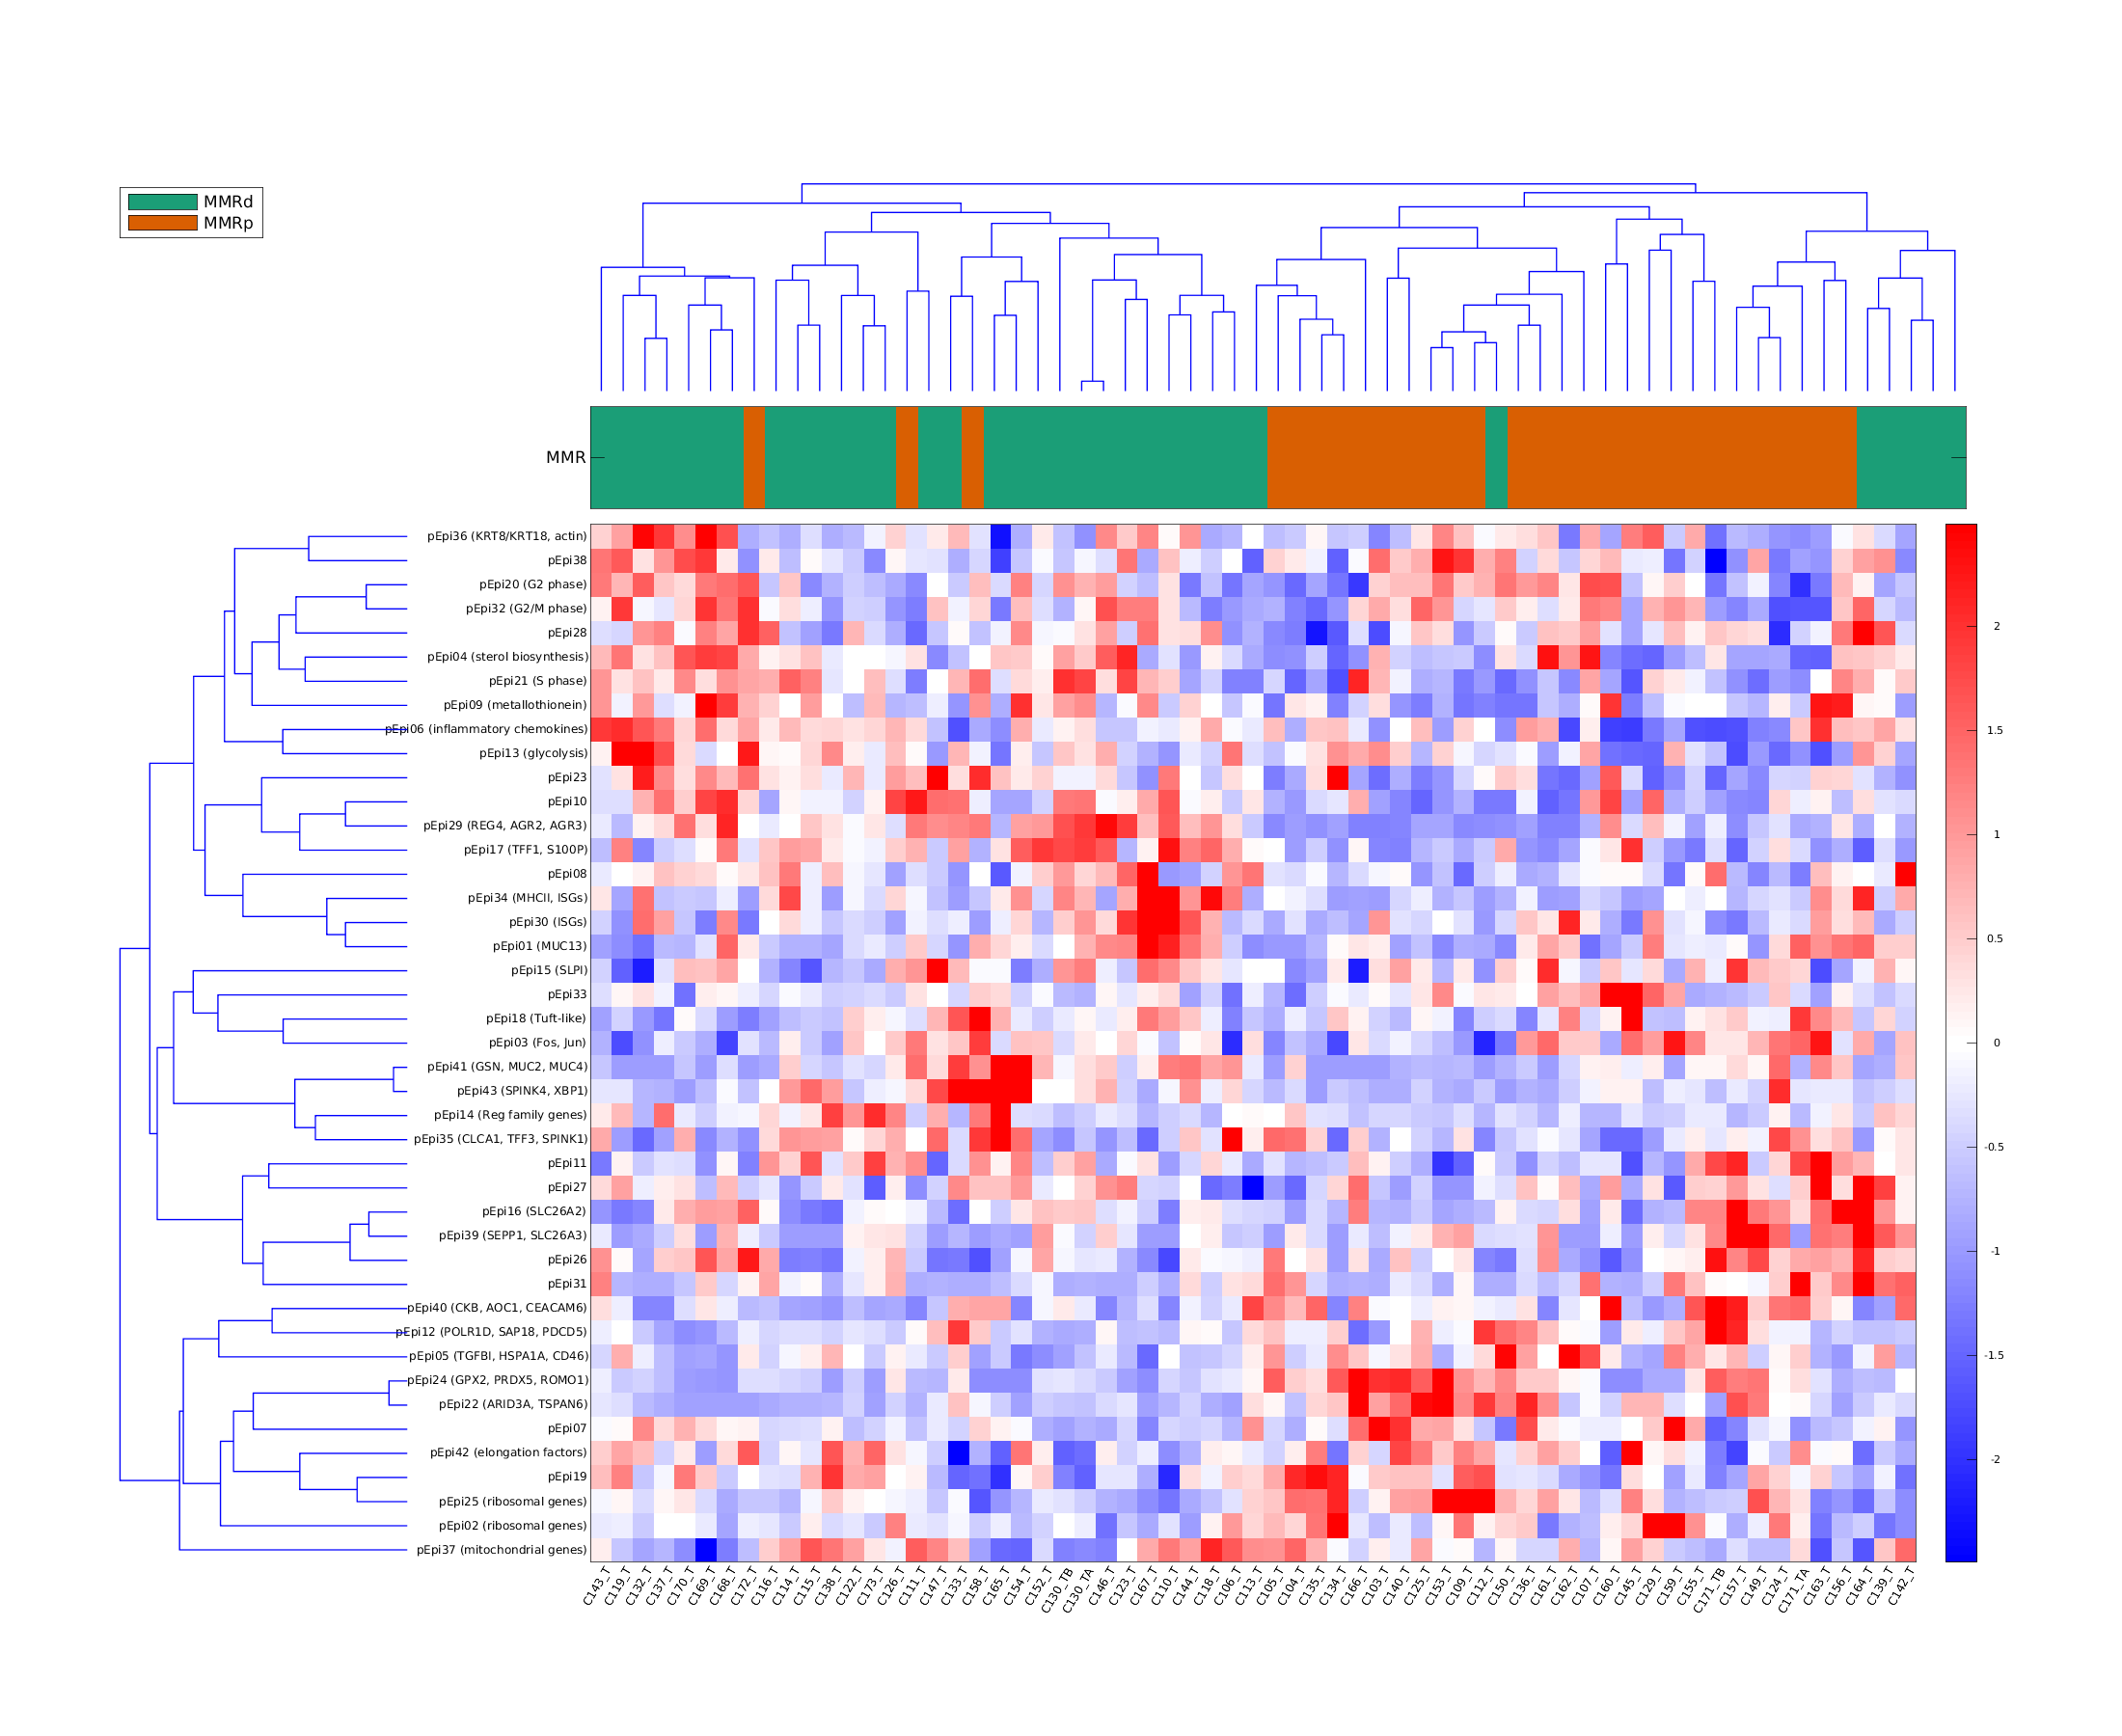

In [88]:
%plot -s 2200,1800
[zB,~,~,zCnt] = fastUnique(colon10x_default.metatable.PatientTypeID);
zB(zCnt< 1000)
zSel1K = ismember(colon10x_default.metatable.PatientTypeID,setdiff(zB(zCnt > 1000),'C151_N'));


%%

zp = 'EpiTGlobalv5ForceK43';

zSel = zSel1K & strgrep(colon10x_default.annot.clTopLevel,'Epi');

zHmat = ccNMFexpAlt.Hmat.(zp)';
zHmat = zHmat(zSel,:);
zPidB = mergeStringPair(colon10x_default.metatable.MMRStatusTumor(zSel),colon10x_default.metatable.PatientTypeID(zSel));

zWnames = ccNMFexpAlt.wNamesSt.(zp);


zopts = [];
zopts.aggrFunc = @(X,dim)quantile(X,0.75,dim);
[zWq75mat,~,zWpid] = summarize_group(zHmat',zPidB,zopts);

%% 

zWnames = ccNMFexpAlt.wNamesSt.EpiTGlobalv5ForceK43;
zSelP = strgrep(zWpid,'_N');

zWpid(zSelP) = [];
zWq75mat(:,zSelP) = [];
%%

zopts = [] 
zopts.maxLabelY = 150;
zopts.maxLabelX = 150;
zopts.showTxt = 0;

zopts.annotX.sampleID = zMergeT.PatientTypeID;
zopts.annotX.MMR = zMergeT.MMRStatusTumor;

zopts.axisFontSize = 9;
zopts.colorLim = [ 0.02 0.98 ];

zWpidT = regexprep(zWpid,'^[^_]*_','');
%%

zX = nanzscore(zWq75mat,[],2);

%%
% TODO add adjacent normal

[zfigOut,outMat,outMat.zOrdTX,outMat.zOrdTY] = plot_heatmap_annot(zX,zWnames,zWpidT,[],[],zopts);

%%

zOutPlot = sprintf('%s/Fig4b_pEpiGlobal_q75_HC',zOutP);    
cFname = print_plot(zfigOut,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfigOut)

### Figure 4C -- Composition of inferred epithelial cell types


zax = 

  Axes with properties:

             XLim: [0.6000 64.4000]
             YLim: [0 1.0000]
           XScale: 'linear'
           YScale: 'linear'
    GridLineStyle: ':'
         Position: [0.1300 0.1544 0.7750 0.7706]
            Units: 'normalized'

  Use GET to show all properties

Saving plot: ../results/figures//Figure_4/Fig4c_maligEpi_cellcomp_bar.png.-dpng


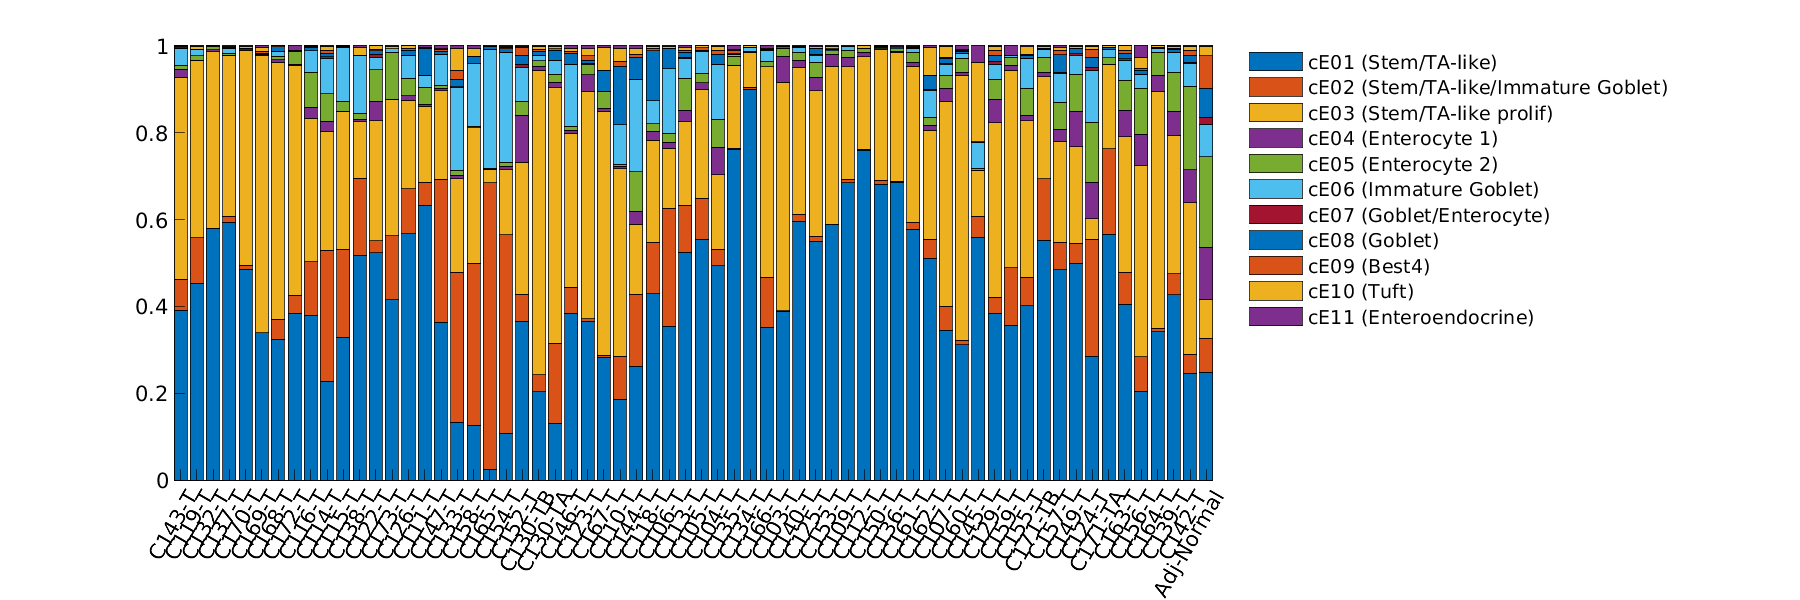

In [90]:
%plot -s 1800,600

zClEpi = colon10x_default.annot.clFull(zSel);
zPidEpi =colon10x_default.metatable.PatientTypeID(zSel);

% plot_crosstab_bar(zPidEpi,zClEpi,[],zopts)

zClPidTable = crossTabTable(zClEpi,zPidEpi,1,3);

%% 

[~,zia,zib] = intersect(zClPidTable.Properties.VariableNames,outMat.xNameOrd);

zord = zia(argsort(zib));

zClPidTorder = zClPidTable(:,zord);

zSelN = strgrep(zClPidTable.Properties.VariableNames,'_N');
zTabN = zClPidTable(:,zSelN);
zFreqN = median(table2array(zTabN),2);
zFreqN = zFreqN/sum(zFreqN);

zClPidTorder.Adj_Normal = zFreqN;

%% 

zfig = figure('Position',[ 1 1 1800 600]);
zax = bar(table2array(zClPidTorder)','stacked');
xName = zClPidTorder.Properties.VariableNames;
box off 
axis tight 
%%

zax = zfig.Children;
set(zax,'xtick',1:length(xName));
set(zax,'xticklabels', regexprep(xName,'_','-'));

zax.XTickLabelRotation = 60
legend(unique(zClEpi),'Location','northeastoutside','box','off','interpreter','none')

%%

zOutPlot = sprintf('%s/Fig4c_maligEpi_cellcomp_bar',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfigOut)

### Epithelial global program violin plots and tSNE

Done - return
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness specified, defaults to n_lightness=1
Custom colormap without n_color and n_lightness spe

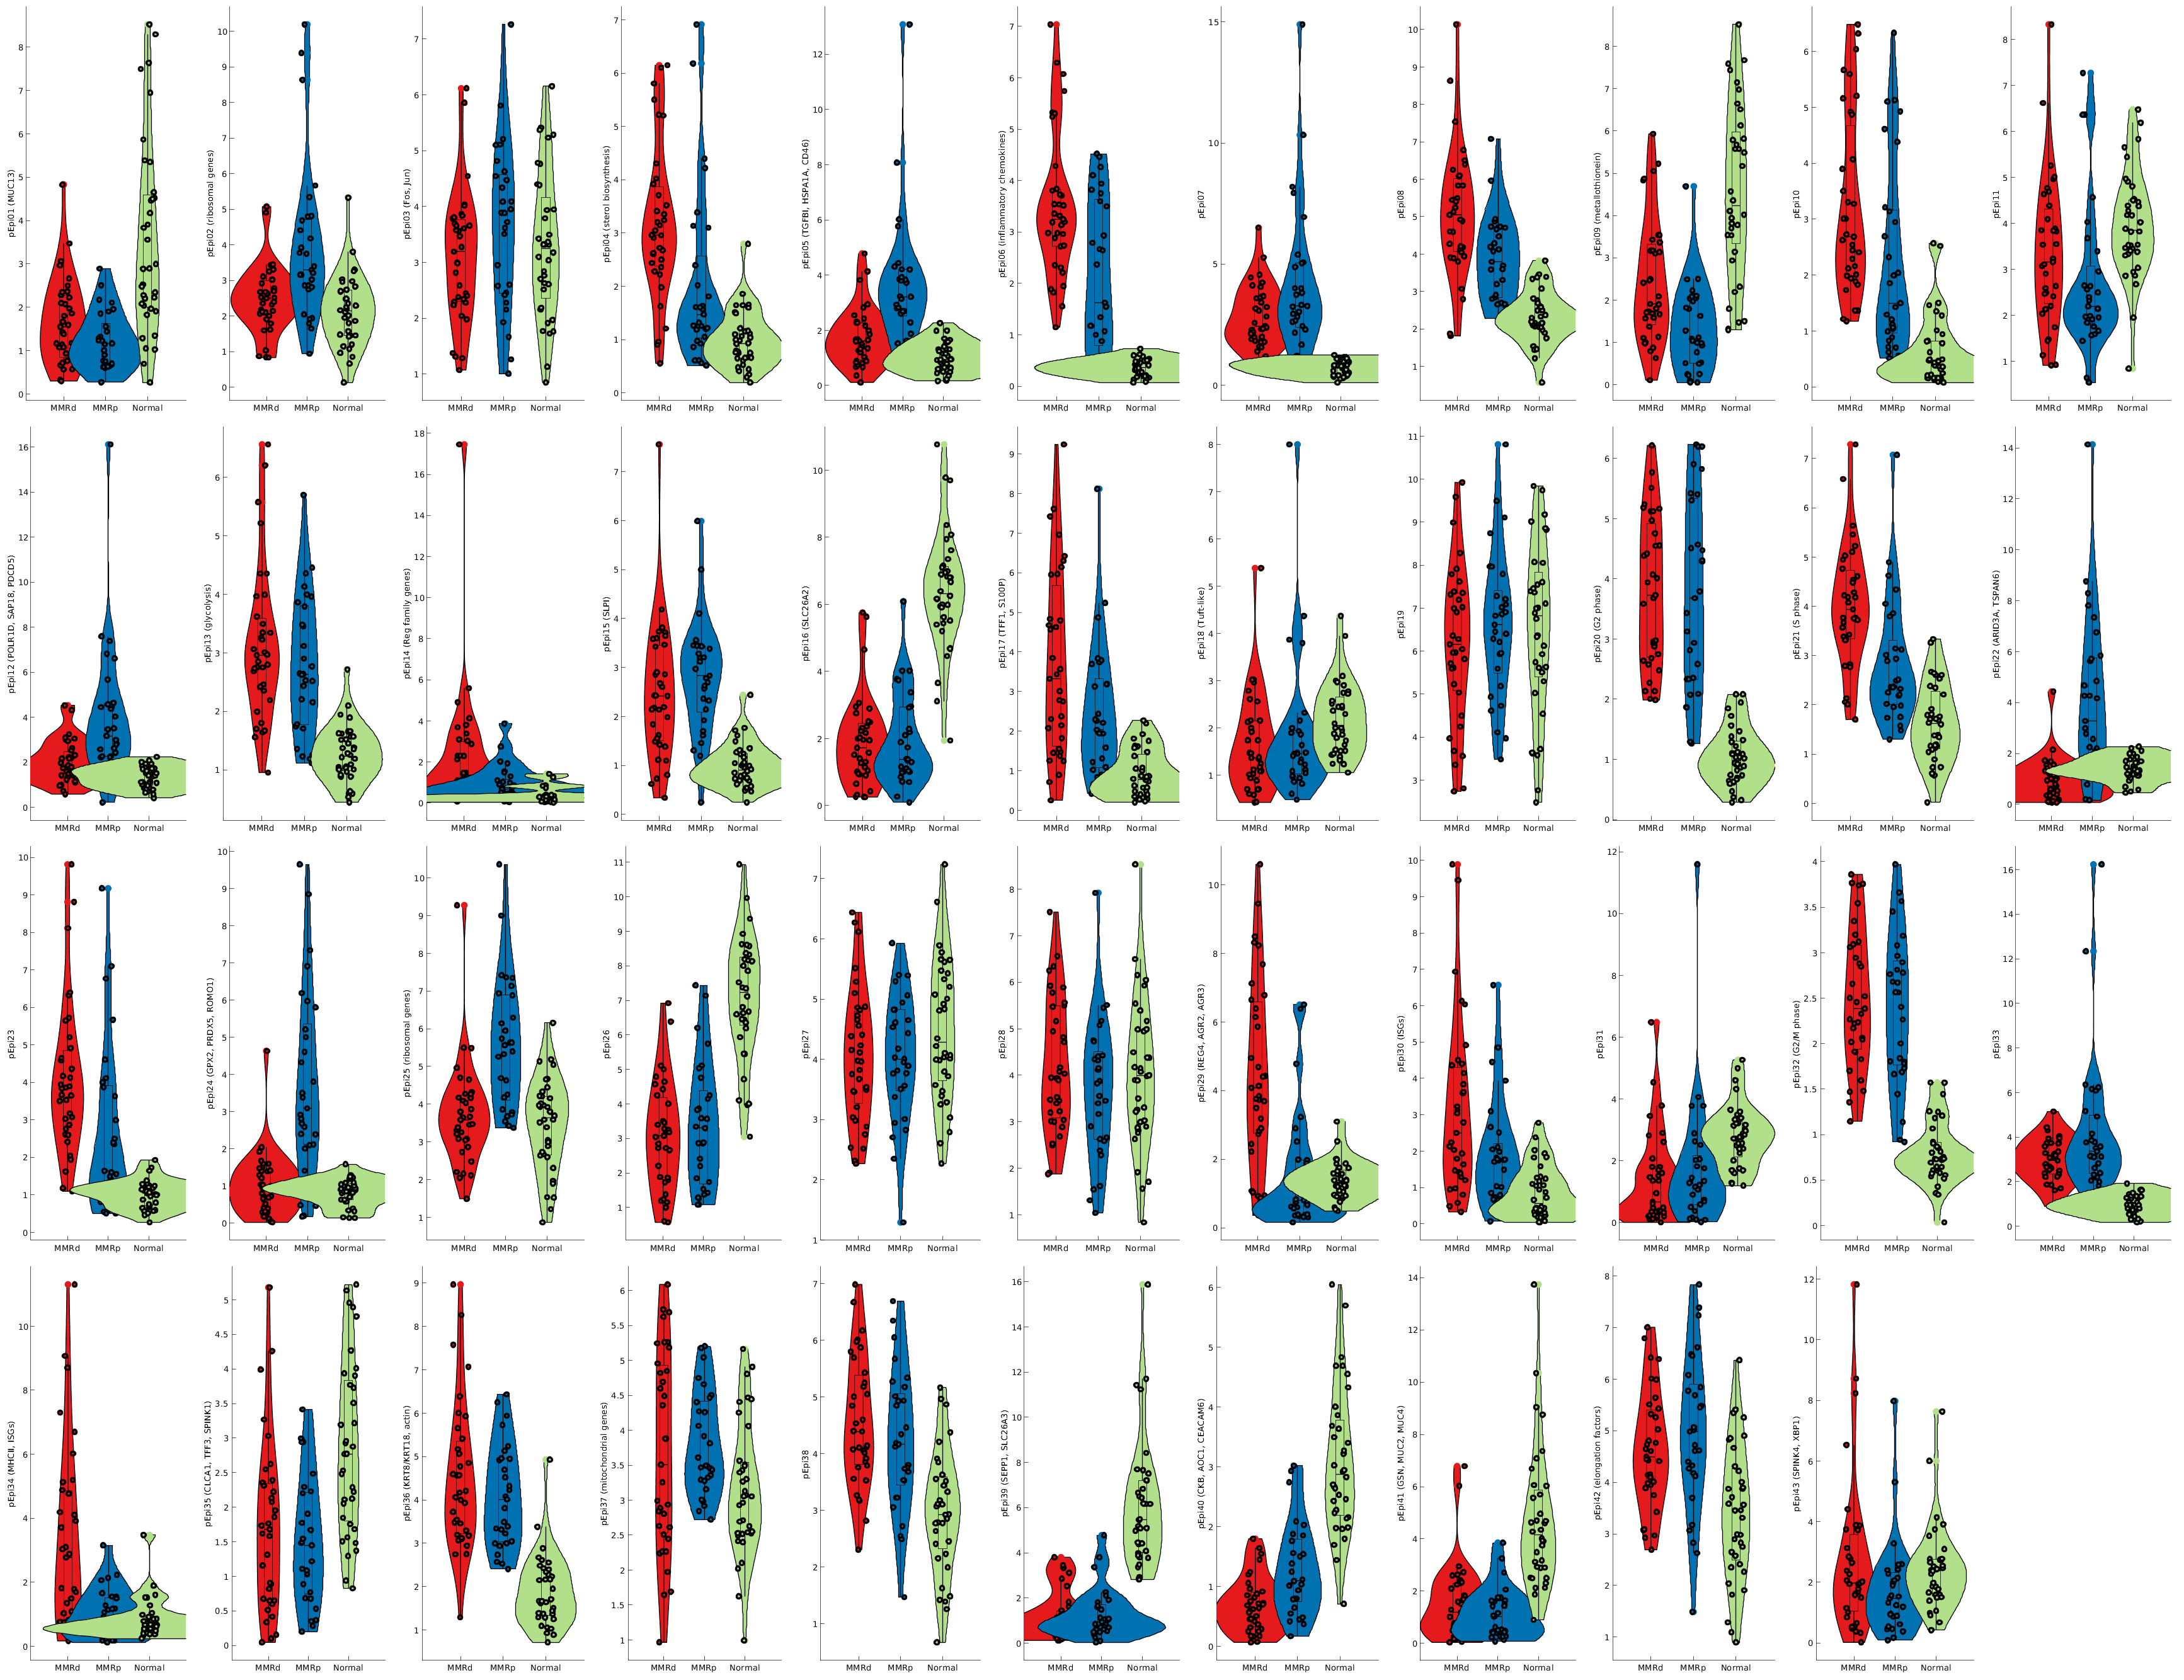

In [91]:
%plot -s 2600,1600

zcf = 'Epi';
zp = 'EpiTGlobalv5ForceK43';

[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);
zCl = colon10x_default.annot.clMidway(zia);
zMMRtype = colon10x_default.metatable.MMRStatusTumor(zia);

zHmat = ccNMFexpAlt.Hmat.(zp)';
zHmat = zHmat(zia,:);

zWnames = ccNMFexpAlt.wNamesSt.(zp);

%% 

zBID = mergeStringPair(colon10x_default.metatable.MMRStatusTumor,colon10x_default.metatable.PatientTypeID);
zBIDsub = zBID(zia);

%%

zopts = [];
zopts.aggrFunc = @(X,dim)quantile(X,0.75,dim);
[zHq75,~,zN] = summarize_group(zHmat',zBIDsub);
zHq75 = zHq75';

%%

zNtype = regexprep(zN,'_.*','');

%% 

zPn = luniq(zWnames);
zNrow = 4;
zNcol = ceil(zPn/zNrow);

%%


zfig = figure('Position',[ 0 0 2600 500*zNrow]);

zopts = [];
zopts.widthV = 0.9;
zopts.widthBox = 0.6;
zopts.doJitter = 0.4;
zopts.cmap = colorSet(zColSet.crcTypeC);
clear g 

for zi = 1:zPn
    zx = floor((zi-1)/zNcol) + 1;
    zy = mod(zi-1,zNcol) + 1;
    
    g(zx,zy) = gramm('x',zNtype,'y',zHq75(:,zi),'Color',zNtype);
    g(zx,zy).stat_violin2('width',zopts.widthV);
    g(zx,zy).stat_boxplot('width',zopts.widthBox);
    g(zx,zy).geom_jitter('width',zopts.doJitter);
    g(zx,zy).set_names('x','','y',zWnames{zi});
end


g.set_color_options('map',zopts.cmap,'n_color',size(zopts.cmap,1));
g.set_layout_options('legend',false);

outG = g.draw();

%%

zfig = gcf();
zOutPlot = sprintf('%s/Fig4d_expProgramPidViolin_Epi_MMRsplit',zOutP);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);
% close(zfig)


zopts =

     []

Saving plot: ../results/figures//Figure_4/Fig4d_tSNE_Epi_Hmat_EpiTGlobalv5ForceK43_1.png.-dpng
Saving plot: ../results/figures//Figure_4/Fig4d_tSNE_Epi_Hmat_EpiTGlobalv5ForceK43_2.png.-dpng
Saving plot: ../results/figures//Figure_4/Fig4d_tSNE_Epi_Hmat_EpiTGlobalv5ForceK43_3.png.-dpng


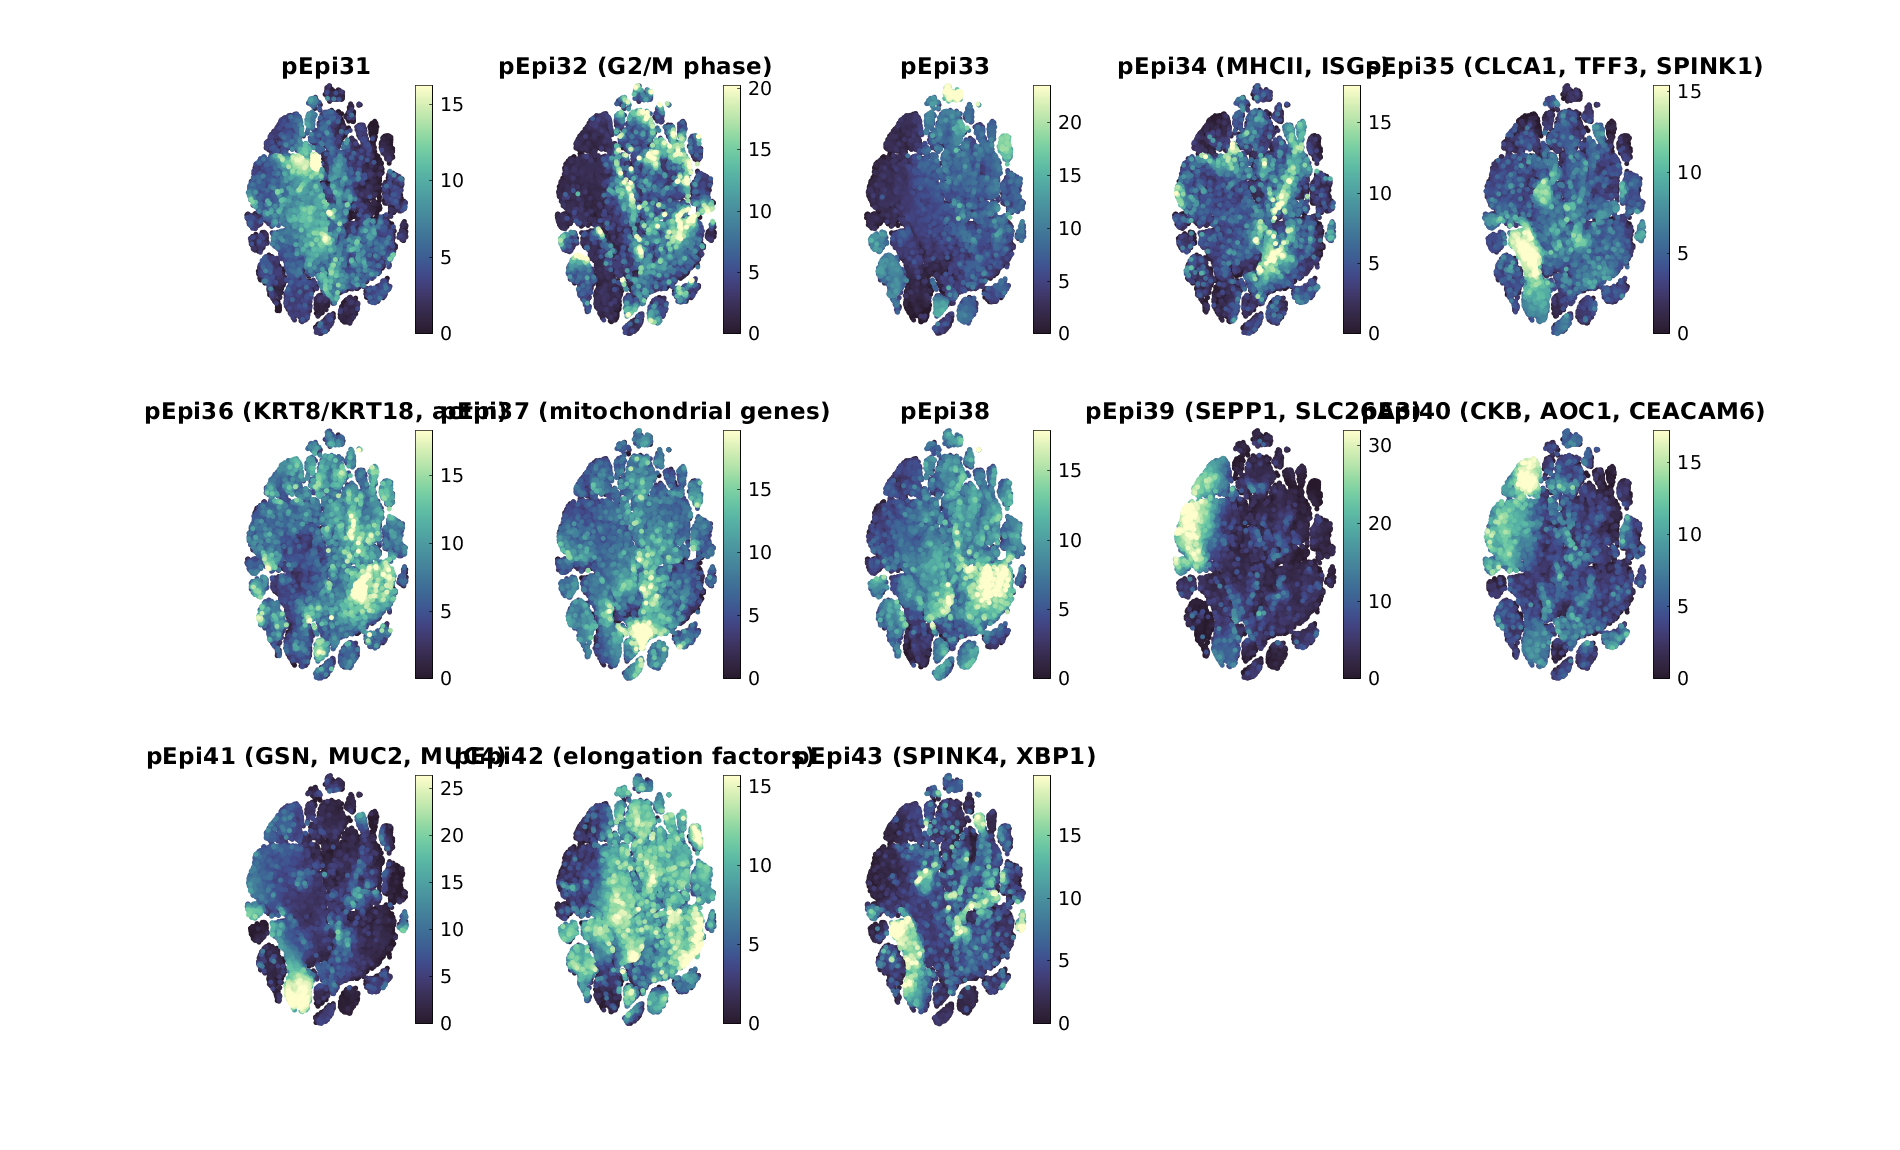

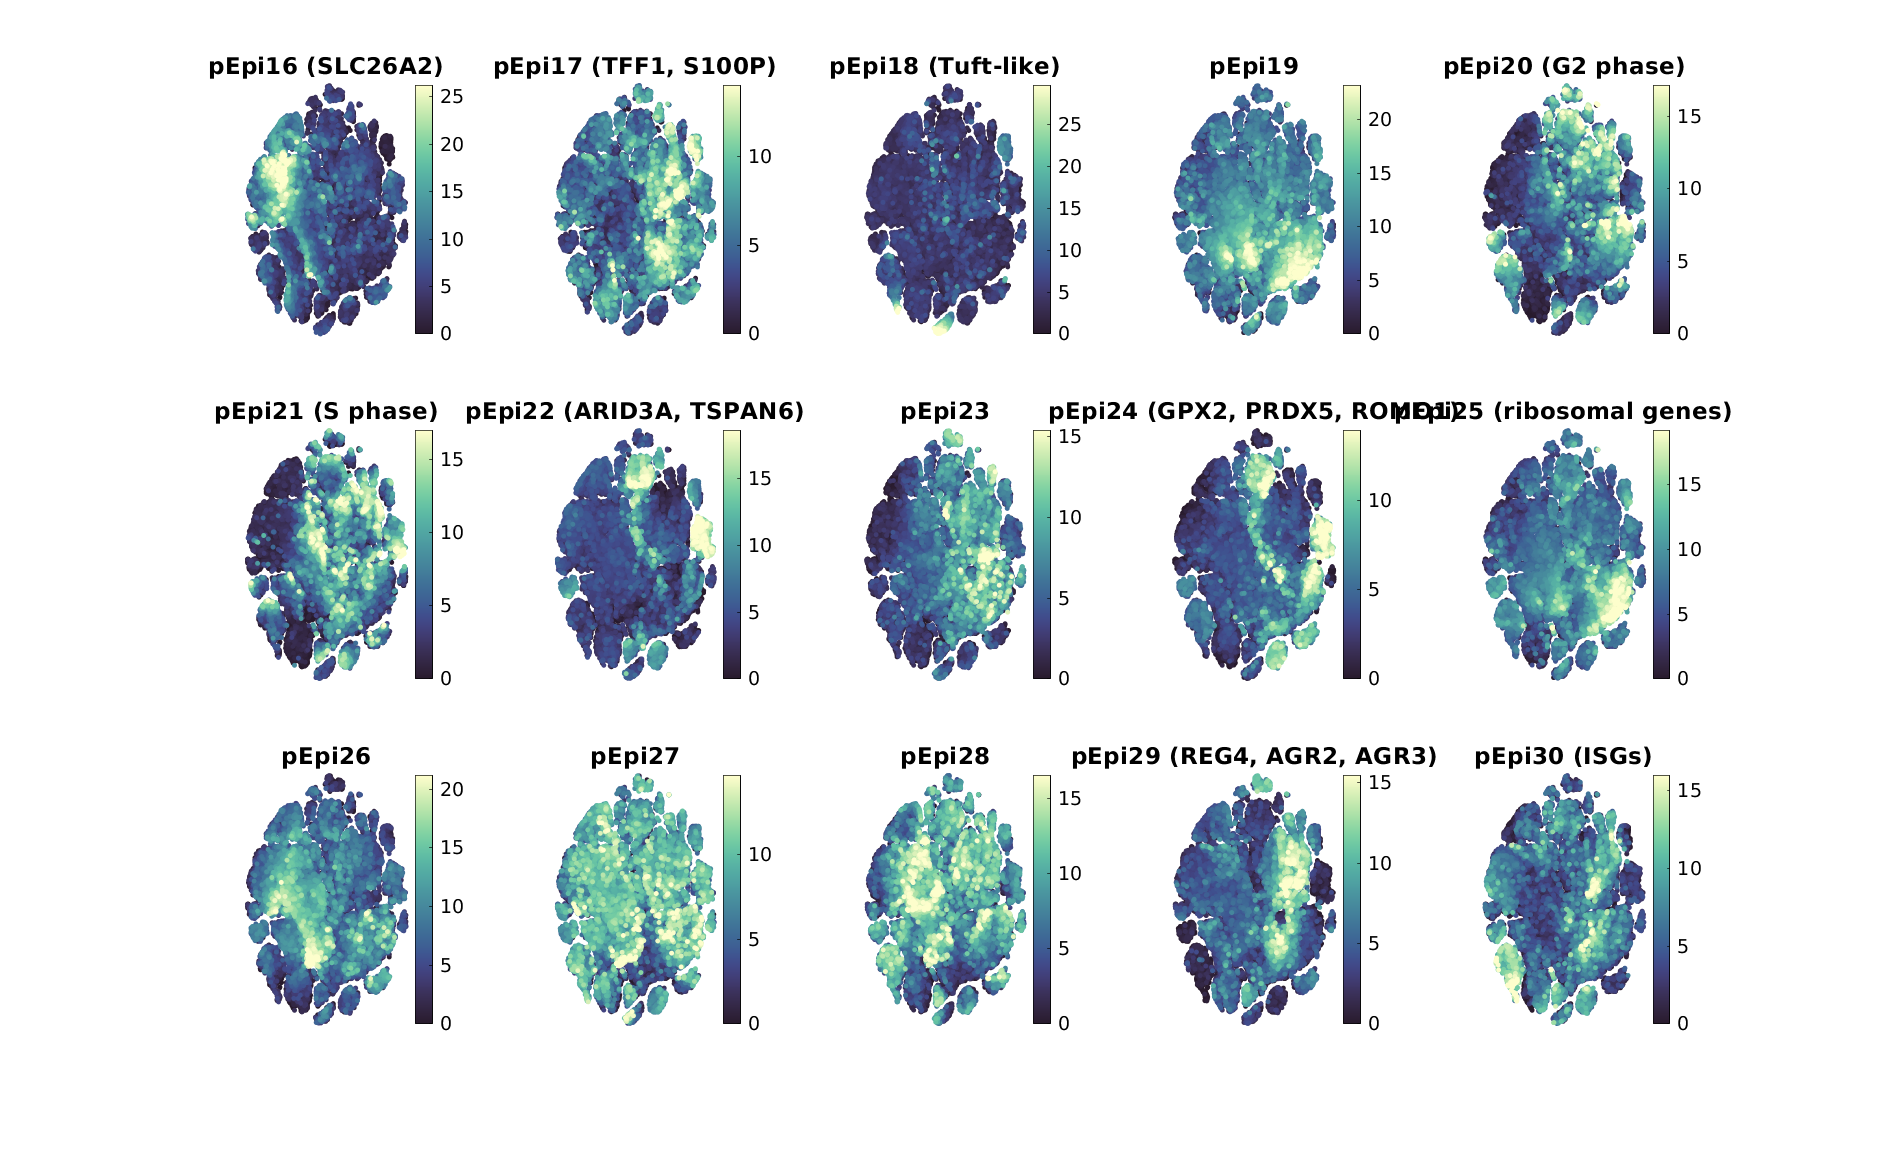

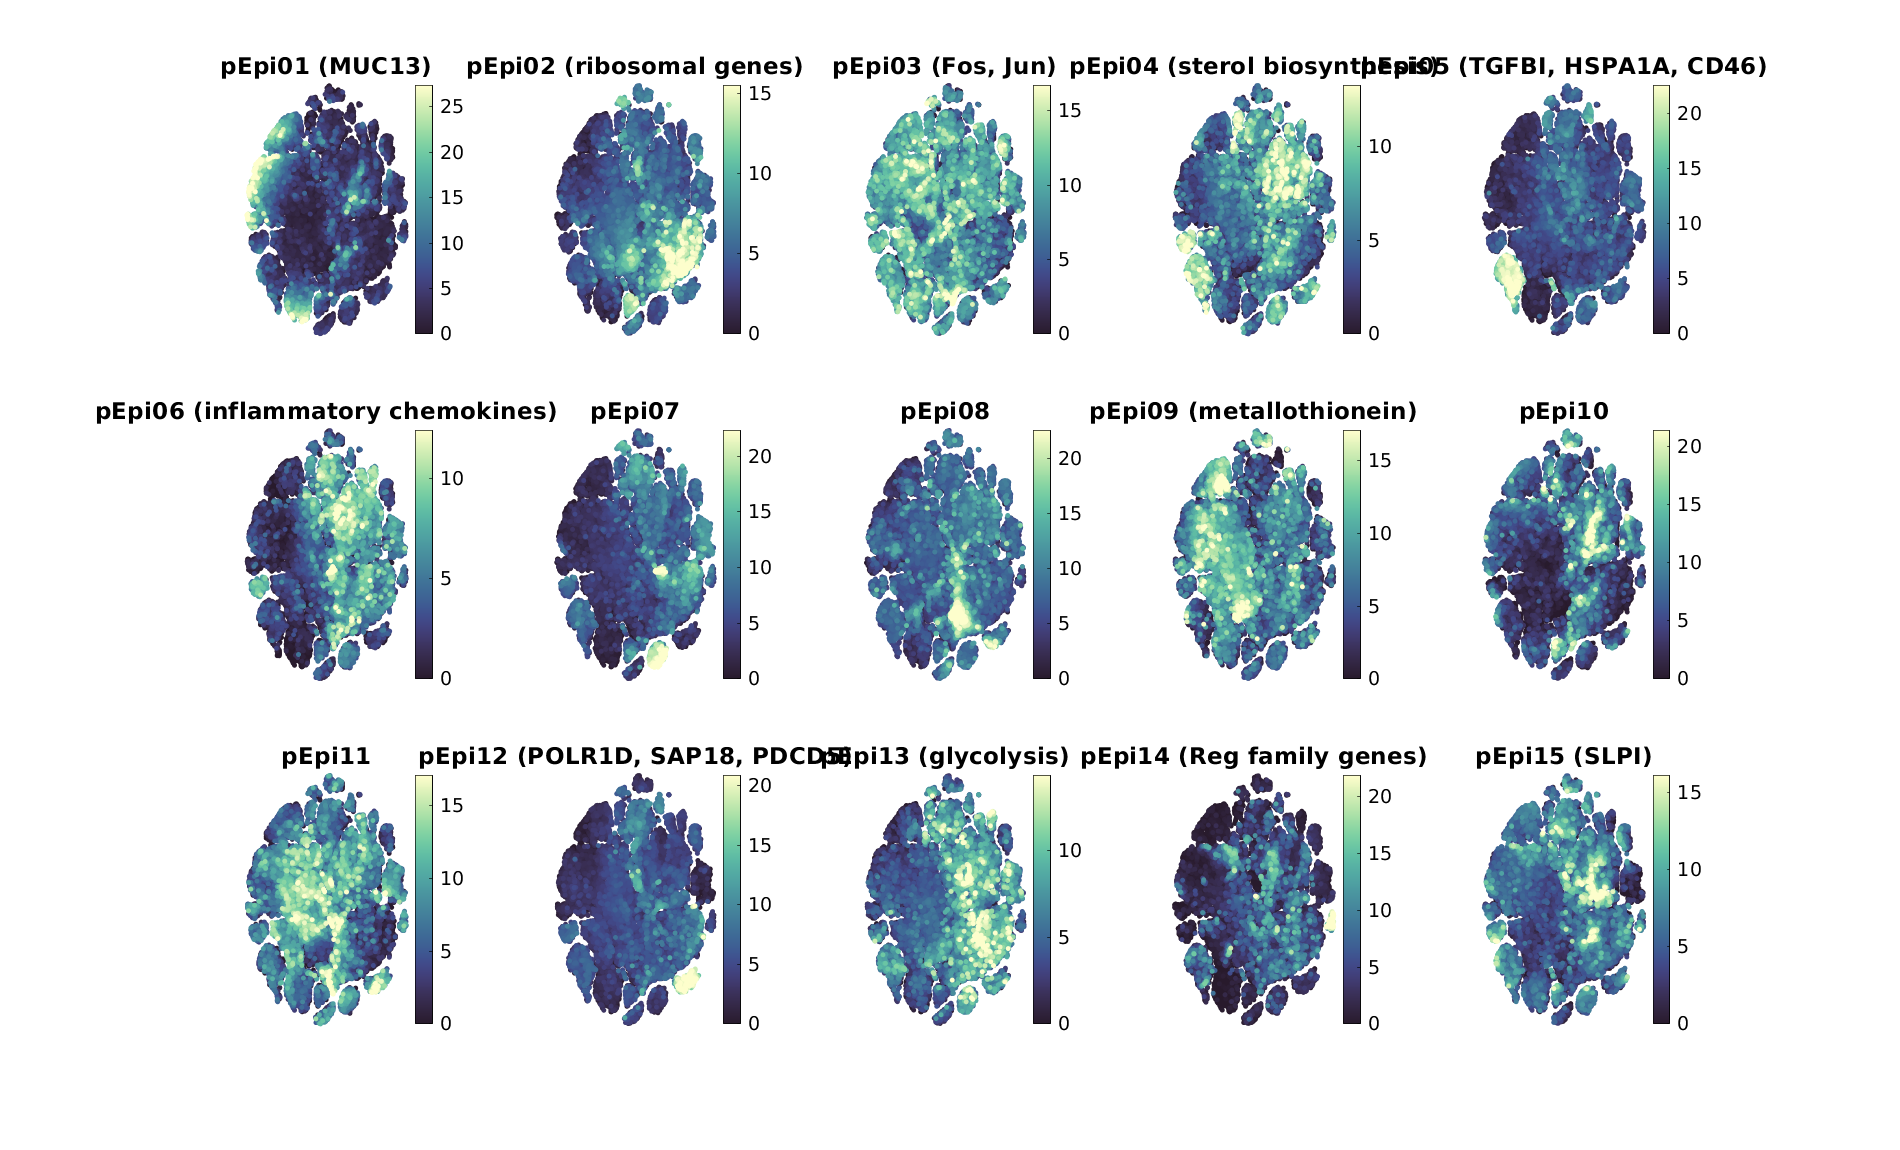

In [93]:
%plot -s 1900,1150

zcf = 'Epi';
zp = 'EpiTGlobalv5ForceK43';

[zia,zib] = comember(colon10x_default.sampleID,tSNE_coord.(zcf).sampleID);

zYdata = tSNE_coord.(zcf).ydata(zib,:);
zHval = ccNMFexpAlt.Hmat.(zp)';

zopts = []
zopts.pSize = 7;
zopts.doAlpha = 0.7;
zopts.qTrimLimNNZ = 0.999;
zopts.titleText = ccNMFexpAlt.wNamesSt.(zp);
zopts.nCol = 5;
zopts.nRow = 3;
zopts.tiledLayout = 0;
zopts.plotSize = [ 1 1 1900 1150 ];
zopts.cmap = flipud(cptcmap('deep'));

zfig = plot_tsne_scatter_multi(zYdata,zHval(zia,:),[],[],zopts);

%% 

zOutPlot = sprintf('%s/Fig4d_tSNE_%s_Hmat_%s',zOutP,zcf,zp);    
cFname = print_plot(zfig,zOutPlot,outDirPlot,outSuf{1},1);